<a href="https://colab.research.google.com/github/nccreang/pyUSID/blob/master/px_svd_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pycroscopy/pycroscopy.git
# !git clone https://github.com/pycroscopy/pyUSID.git


Cloning into 'pycroscopy'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 21748 (delta 3), reused 29 (delta 3), pack-reused 21714
Receiving objects: 100% (21748/21748), 319.72 MiB | 23.33 MiB/s, done.
Resolving deltas: 100% (15825/15825), done.


In [2]:
# !pip install pycroscopy
!pip install pyUSID
!pip install sidpy

!pip install igor
!pip install gwyfile

     |████████████████████████████████| 174kB 11.8MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 788kB 18.5MB/s 
     |████████████████████████████████| 481kB 28.1MB/s 
     |████████████████████████████████| 358kB 49.2MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp36-cp36m-linux_x86_64.whl size=1225601 sha256=e79522fa7029e38f5052fd295d1efd6b680d31483ab4212ecd48484338b10d57
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [1]:
# import pycroscopy as px
import pyUSID as usid
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sidpy

import igor
import gwyfile

/usr/local/lib/python3.6/dist-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [2]:
import pycroscopy.pycroscopy as px

In [2]:
pip show pycroscopy

In [3]:
mat = np.random.rand(350,350)

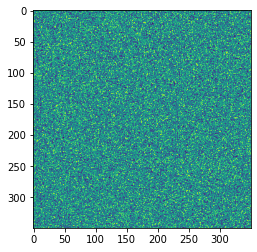

In [4]:
plt.figure()
plt.imshow(mat)

In [5]:

# os.remove('test.h5')


file_path = 'test.h5'
h5_file = h5py.File(file_path)

spec_dims = usid.Dimension('blah', 'blah2', 1)

pos_dims = [usid.Dimension('x', 'xx', 350),
            usid.Dimension('y', 'yy', 350)]

raw_data_2d = mat.ravel().reshape(122500,1)

tran = usid.NumpyTranslator()
_ = tran.translate(file_path, 'svd_test',
                   raw_data_2d, 'test', 'testt',
                   pos_dims, spec_dims)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """
/usr/local/lib/python3.6/dist-packages/sidpy/sid/translator.py:44: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyUSID/io/dtype_utils.py:65: FutureWarning: pyUSID.io.dtype_utils.contains_integers has been moved to sidpy.base.num_utils.contains_integers. This copy in pyUSID willbe removed in future release. Please update your import statements
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyUSID/io/dtype_utils.py:312: FutureWarni

In [6]:

# os.remove('test.h5')


file_path = 'test.h5'
h5_file = h5py.File(file_path)

spec_dims = usid.Dimension('blah', 'blah2', 1)

pos_dims = [usid.Dimension('x', 'xx', 350),
            usid.Dimension('y', 'yy', 350)]

raw_data_2d = mat.ravel().reshape(122500,1)

tran = usid.NumpyTranslator()
_ = tran.translate(file_path, 'svd_test',
                   raw_data_2d, 'test', 'testt',
                   pos_dims, spec_dims)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """
/usr/local/lib/python3.6/dist-packages/sidpy/sid/translator.py:44: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  FutureWarning)


In [7]:
h5_file= h5py.File(file_path,mode='r+')
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [8]:
h5_main = usid.USIDataset(h5_file['/Measurement_000/Channel_000/Raw_Data'])
print(h5_main)

<HDF5 dataset "Raw_Data": shape (122500, 1), type "<f8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	test (testt) 
Data dimensions and original shape: 
Position Dimensions: 
	y - size: 350 
	x - size: 350 
Spectroscopic Dimensions: 
	blah - size: 1
Data Type:
	float64


In [9]:
decomposer = px.processing.svd_utils.SVD(h5_main,num_components=100)


Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


In [10]:
tester = decomposer.test()

> /content/pycroscopy/pycroscopy/processing/svd_utils.py(133)test()
-> self.__u, self.__s, self.__v = randomized_svd(self.data_transform_func(self.h5_main), self.num_components,
(Pdb) n
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(134)test()
-> n_iter=3)
(Pdb) n
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(135)test()
-> print(self.__u.shape)
(Pdb) n
(122500, 1)
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(136)test()
-> print(self.__s.shape)
(Pdb) n
(1,)
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(137)test()
-> print(self.__v.shape)
(Pdb) n
(1, 1)
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(138)test()
-> self.__v = stack_real_to_target_dtype(self.__v, self.h5_main.dtype)
(Pdb) n
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(139)test()
-> print(self.__v.shape)
(Pdb) n
()
> /content/pycroscopy/pycroscopy/processing/svd_utils.py(141)test()
-> print('Took {} to compute randomized SVD'.format(format_time(time.time() - t

BdbQuit: ignored

In [ ]:
h5_svd_group = decomposer.compute()

#Testing svd function: issue with shape of s, v, d output

In [20]:
from sidpy.hdf.dtype_utils import check_dtype, stack_real_to_target_dtype
from sklearn.utils.extmath import randomized_svd

In [24]:
data_transform_func, is_complex, is_compound, n_features, type_mult = check_dtype(h5_main)

In [26]:
data_transform_func(h5_main).shape

(122500, 1)

In [21]:

num_components=100
u, s, v = randomized_svd(data_transform_func(h5_main), num_components,n_iter=3)

In [17]:
u.shape

(122500, 1)

In [18]:
s.shape

(1,)

In [19]:
v.shape

(1, 1)

In [22]:
v2 = stack_real_to_target_dtype(v, h5_main.dtype)

In [23]:
v2.shape # This seems like the issue, since it is trying to 
         # reshape a value which doesn't have a shape

()

# Testing if reshape data will fix the issue

In [27]:
test_data = data_transform_func(h5_main).reshape(350,350)

In [28]:
num_components=100
u, s, v = randomized_svd(data_transform_func(h5_main), num_components,n_iter=3)

In [29]:
print('U: '+str(u.shape))
print('S: '+str(s.shape))
print('V: '+str(v.shape))

U: (122500, 1)
S: (1,)
V: (1, 1)


Nope, that does nothing

# Testing stack_real_to_target_dtype

In [30]:
h5_main.dtype

dtype('<f8')

In [37]:
def stack_real_to_target_dtype(ds_real, new_dtype, lazy=False):
    """
    Transforms real data into the target dtype
    Parameters
    ----------
    ds_real : :class:`numpy.ndarray`, :class:`dask.array.core.Array` or :class:`h5py.Dataset`
        n dimensional real-valued numpy array or HDF5 dataset
    new_dtype : :class:`numpy.dtype`
        Target data-type
    Returns
    ----------
    ret_val :  :class:`numpy.ndarray` or :class:`dask.array.core.Array`
        N-dimensional array of the target data-type
    """
    import pdb
    pdb.set_trace()
    if is_complex_dtype(new_dtype):
        return stack_real_to_complex(ds_real, lazy=lazy)
    try:
        if len(new_dtype) > 0:
            return stack_real_to_compound(ds_real, new_dtype, lazy=lazy)
    except TypeError:
        return new_dtype(ds_real)

    # catching all other cases, such as np.dtype('<f4')
    return new_dtype.type(ds_real)

def is_complex_dtype(dtype):
    """
    Checks if the provided dtype is a complex dtype
    Parameters
    ----------
    dtype : object
        Object that is a class:`h5py.Datatype`, or :class:`numpy.dtype` object
    Returns
    -------
    is_complex : bool
        True if the dtype was a complex dtype. Else returns False
    """
    validate_dtype(dtype)
    if dtype in [np.complex, np.complex64, np.complex128]:
        return True
    return False


def validate_dtype(dtype):
    """
    Checks the provided object to ensure that it is a valid dtype that can be written to an HDF5 file.
    Raises a type error if invalid. Returns True if the object passed the tests
    Parameters
    ----------
    dtype : object
        Object that is hopefully a :class:`h5py.Datatype`, or :class:`numpy.dtype` object
    Returns
    -------
    status : bool
        True if the object was a valid data-type
    """
    import pdb
    pdb.set_trace()
    if isinstance(dtype, (h5py.Datatype, np.dtype)):
        pass
    elif isinstance(np.dtype(dtype), np.dtype):
        # This should catch all those instances when dtype is something familiar like - np.float32
        pass
    else:
        raise TypeError('dtype should either be a numpy or h5py dtype')
    return True

In [ ]:
v2 = stack_real_to_target_dtype(v, h5_main.dtype)

> <ipython-input-37-91d884e069c2>(17)stack_real_to_target_dtype()
-> if is_complex_dtype(new_dtype):
(Pdb) n
> <ipython-input-37-91d884e069c2>(61)validate_dtype()
-> if isinstance(dtype, (h5py.Datatype, np.dtype)):
(Pdb) n
> <ipython-input-37-91d884e069c2>(62)validate_dtype()
-> pass
(Pdb) n
> <ipython-input-37-91d884e069c2>(68)validate_dtype()
-> return True
(Pdb) n
--Return--
> <ipython-input-37-91d884e069c2>(68)validate_dtype()->True
-> return True
(Pdb) n
> <ipython-input-37-91d884e069c2>(41)is_complex_dtype()
-> if dtype in [np.complex, np.complex64, np.complex128]:
(Pdb) n
> <ipython-input-37-91d884e069c2>(43)is_complex_dtype()
-> return False
(Pdb) n
--Return--
> <ipython-input-37-91d884e069c2>(43)is_complex_dtype()->False
-> return False
(Pdb) n
> <ipython-input-37-91d884e069c2>(19)stack_real_to_target_dtype()
-> try:
(Pdb) n
> <ipython-input-37-91d884e069c2>(20)stack_real_to_target_dtype()
-> if len(new_dtype) > 0:
(Pdb) new_dtype
dtype('<f8')
(Pdb) n
> <ipython-input-37-91d88